# Particle tracking Loop

We are going to obtain the tracking data from the videos used to measure the potential generated by optical traps forming a ring.
The tracking matrix will be saved as csv files to save computation time in the analysis project.  

In [1]:
#Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import scipy.optimize as opt
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

import av

import support as sp

from tqdm import tqdm_notebook as prog_bar

from slicerator import pipeline
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

## Loop Process

In [82]:
directory = r"C:\Users\Eric\Documents\Projects\Kibble-Zurek Mechanism\Kibble-Zurek_tests\20191001\Test16"

In [83]:
pre_list = sp.get_names(directory,ext = ".avi")

pre_list = pre_list[:]

omit = []

pre_list = [name for name in pre_list if 
     all([os.path.split(name)[-1]!=item for item in omit])]

# date = "20190722"
video_list = pre_list

# for video in pre_list:
#     if date in video:
#         video_list.append(video)

In [84]:
len(video_list)

60

In [85]:
video_list[0]

'C:\\Users\\Eric\\Documents\\Projects\\Kibble-Zurek Mechanism\\Kibble-Zurek_tests\\20191001\\Test16\\Test16_2019_10_01_19_31_54'

In [86]:
i = 0

for video_path in prog_bar(video_list):
    #Video opening
    filePath = video_path+'.avi'
    video = pims.open(filePath)
    
    #Feature location in all the frames
    f = tp.batch(as_gray(video[:]), 19, minmass = 3500, invert=False)
    #Link of trajectories
    t = tp.link_df(f, 20, memory=60) #Link of trajectories: max displacement = 20, memory 60 frames

    t.to_csv(r"C:\Users\Eric\Documents\Python_Scripts\Kibbke-Zurek\20191001\Tracking_Test16_{0}.dat".format(i), sep='\t')

    i+=1

Frame 77: 50 trajectories present.



## Single File Process

In [2]:
#Video import to variable container
filePath = r'C:\Users\Eric\Desktop\Kibble-Zurek_tests\20190629\Test2_2019_06_26_16_32_13.avi'
video = pims.open(filePath)
#video = pims.Video(filePath)

C:\Users\Eric\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: list indices must be integers or slices, not av.video.stream.VideoStream
  warn(message)


deprecated pixel format used, make sure you did set range correctly


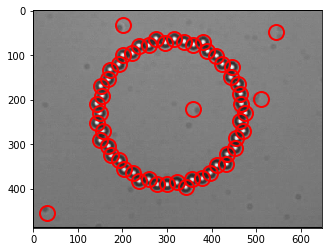

In [3]:
#Show first frame of the video with the particle localization
f = tp.locate(as_gray(video[2351]), 19, invert=False) #len(video)-1
plt.figure() #make a new figure
tp.annotate(f, as_gray(video[2351]));

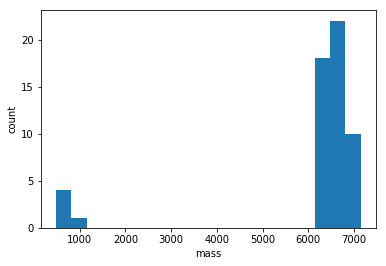

In [4]:
#Histogram of brightness mass to correct the wrong particle localization
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

#label the axes
ax.set(xlabel='mass', ylabel='count');

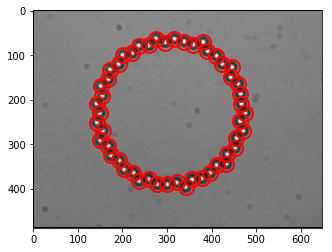

In [5]:
f = tp.locate(as_gray(video[2351]), 19, invert=False, minmass=4000)
plt.figure()
tp.annotate(f, video[2351])

In [6]:
#Location of features in all the frames
f = tp.batch(as_gray(video[:2351]), 19, minmass = 4000, invert=False);

Frame 2350: 50 features


Frame 2350: 50 trajectories present.


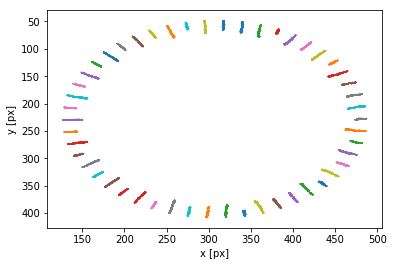

In [7]:
t = tp.link_df(f, 20, memory=60) #Link of trajectories: max displacement = 20, memory 60 frames

#Trace the trajectories
plt.figure()
tp.plot_traj(t);

In [8]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,49.307624,317.788364,6693.013241,3.190913,0.047325,143.494012,27101.0,-0.079696,0,0
27,252.427575,129.197138,6490.573555,3.247941,0.041292,139.326136,27104.0,-0.079748,0,1
28,272.399082,482.035919,6746.600216,3.186811,0.023822,151.234353,25182.0,-0.056216,0,2
29,274.348872,134.043995,6360.773993,3.214143,0.049805,140.516958,26452.0,-0.069832,0,3
30,293.509742,474.500878,6784.111099,3.241399,0.018808,147.661888,25290.0,-0.057164,0,4


In [9]:
t.to_csv("Tracking_Test2_20190626.dat", sep='\t')